<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/Titanic_EDA_Univariado_DarwinJoanPerezAvendano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic (2).csv
User uploaded file "titanic.csv" with length 61194 bytes


## Importación de paquetes

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Lectura de dataset

In [3]:
titanic = pd.read_csv('titanic.csv')

### Revisión del encabezado

In [4]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Forma del dataset

In [5]:
# 12 Columnas.
# 891 Filas.
titanic.shape

(891, 12)

### Tipos de variables en el dataset

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **IDA** :  Análisis inicial de datos

### Análisis univariado de datos

##### Análisis univariado de la edad de los pasajeros

###### Visualización de la variable **``` titanic['Age'] ```**



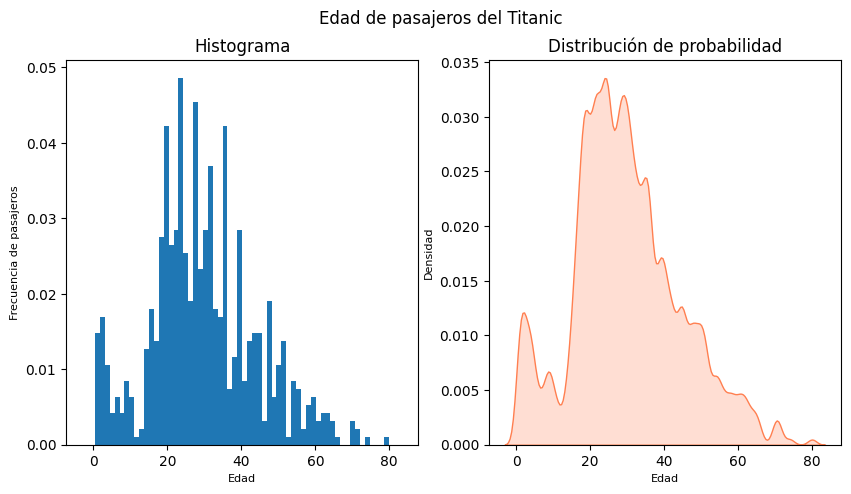

In [7]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Edad de pasajeros del Titanic')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Edad', fontsize = 8)
axes[0].set_ylabel('Frecuencia de pasajeros', fontsize = 8)

axes[1].set_xlabel('Edad', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(titanic['Age'], bins = 60 , density=True)
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = titanic, x = 'Age', bw_adjust=.3, color='coral', fill =True)

plt.show()

###### Estadísticas descriptivas

In [8]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
#Moda de las edades
titanic['Age'].mode()[0]

24.0

In [10]:
#Top 10 de las edades de los pasajeros
titanic['Age'].value_counts().head(10)

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

In [11]:
#Varianza de las edades

titanic['Age'].var()

211.01912474630802

In [12]:
#Coficiente de variación
st_dev_age = np.std(titanic['Age'])

cv_age = round((st_dev_age / titanic['Age'].mean() ),5) * 100
cv_age
#baja varianza

48.878

###### BoxPlot **``` titanic['Age'] ```**

In [13]:
fig = px.box(titanic, y = 'Age')
fig.show()

###### Visualización de valores atipicos

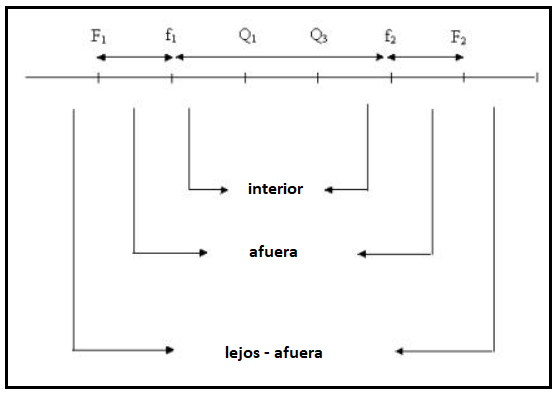

In [14]:
# Rango intercuartil
Q1_age = titanic['Age'].quantile(q=0.25)
Q3_age = titanic['Age'].quantile(q=0.75)

iqr_age = Q3_age - Q1_age
iqr_age

17.875

In [15]:
f1_age = Q1_age - 1.5 * iqr_age # nos da un valor negativo pq estamos tratando de hallar el limite minimo en una distribucion no simetrica
f2_age = Q3_age + 1.5 * iqr_age

print(f1_age,"--", f2_age)

-6.6875 -- 64.8125


In [16]:
F1_age = Q1_age - 3 * iqr_age # nos da un valor negativo pq estamos tratando de hallar el limite minimo en una distribucion no simetrica
F2_age = Q3_age + 3 * iqr_age

print(F1_age,"--" ,F2_age)

-33.5 -- 91.625


In [17]:
#Valores para observar valores atípicos para la edad de los pasajeros.

print("Lejos-Afuera - [",F1_age,"]")
print("Afuera - [",f1_age,"]")
print("Interior - [",Q1_age,"]")
print("Interior - [",Q3_age,"]")
print("Afuera - [",f2_age,"]")
print("Lejos-Afuera - [",F2_age,"]")

Lejos-Afuera - [ -33.5 ]
Afuera - [ -6.6875 ]
Interior - [ 20.125 ]
Interior - [ 38.0 ]
Afuera - [ 64.8125 ]
Lejos-Afuera - [ 91.625 ]


## Conclución de la variable ```Titanic["Age"]```

*   Se puede visualizar  aproximadamente 2 poblaciones, **una de edades menores a 19 años** y **una de mayores de 19 años** (no se puede concluir que la distribución se Bimodal).

* Se puede representar la ditribución como una **Distribución Asimétrica Positiva**, por lo cual la media no es la mejor medida de tendencia central disponible, se deberia recomendar la mediana como estimador de tendencia central.

*   Los **adultos jovenes**, personas que entre **25 a 40 años** de edad son la mayor cantidad de pasajeros que abordaron el Titanic.

*   **6** ancianos (atípicos) abordaron el Titanic con edades mayores a **65** años según **f2 = 65** (Valores afueras del IQR).

* Hay **14** bebes menores e igual a **1 año** de edad que abordaron como pasajero.

* El **C.V.** es de **48.878%** (baja varianza), por lo cual se podria definir que los datos de las muestras son Heterogéneos, por lo tanto la media no es representativa.



##### Análisis univariado del valor del pasaje

###### Visualización de la variable **``` titanic['Fare'] ```**



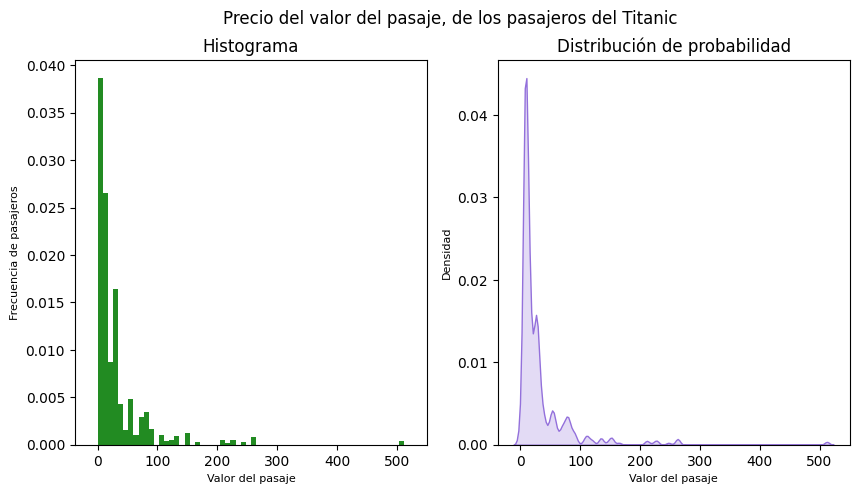

In [18]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
figure.suptitle('Precio del valor del pasaje, de los pasajeros del Titanic')

axes[0].set_title('Histograma')
axes[1].set_title('Distribución de probabilidad')

axes[0].set_xlabel('Valor del pasaje', fontsize = 8)
axes[0].set_ylabel('Frecuencia de pasajeros', fontsize = 8)

axes[1].set_xlabel('Valor del pasaje', fontsize = 8)
axes[1].set_ylabel('Densidad', fontsize = 8)

# Histograma
axes[0].hist(titanic['Fare'], bins = 60 , density=True, color = 'forestgreen')
# Gráfica de distribución
sns.kdeplot(ax=axes[1], data = titanic, x = 'Fare', bw_adjust=.3, color='mediumpurple', fill =True)

plt.show()

###### Estadísticas descriptivas

In [19]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
#Moda de valor del pasaje
titanic['Fare'].mode()[0]

8.05

In [21]:
#Top 10 de los valores de los pasajes
titanic['Fare'].value_counts().head(10)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
7.2292     15
0.0000     15
Name: Fare, dtype: int64

In [22]:
#Varianza

titanic['Fare'].var()

2469.436845743116

In [23]:
#Coficiente de variación
st_dev_fare = np.std(titanic['Fare'])

cv_fare = round((st_dev_fare / titanic['Fare'].mean() ),5) * 100
cv_fare

#Alta varianza

154.221

###### BoxPlot **``` titanic['Fare'] ```**

In [24]:
fig = px.box(titanic, y = 'Fare')
fig.show()

###### Visualización de valores atipicos

In [25]:
# Rango intercuartil
Q1_fare = titanic['Fare'].quantile(q=0.25)
Q3_fare = titanic['Fare'].quantile(q=0.75)

iqr_fare = Q3_fare - Q1_fare
iqr_fare

23.0896

In [26]:
f1_fare = Q1_fare - 1.5 * iqr_fare # nos da un valor negativo pq estamos tratando de hallar el limite minimo en una distribucion no simetrica
f2_fare = Q3_fare + 1.5 * iqr_fare

print(f1_fare, f2_fare)

-26.724 65.6344


In [27]:
F1_fare = Q1_fare - 3 * iqr_fare # nos da un valor negativo pq estamos tratando de hallar el limite minimo en una distribucion no simetrica
F2_fare = Q3_fare + 3 * iqr_fare

print(round(F1_fare,3), F2_fare)

-61.358 100.2688


In [28]:
#Valores para observar valores atípicos para el valor de los pasajes del Barco

print("Lejos-Afuera - [",round(F1_fare,3),"]")
print("Afuera - [",f1_fare,"]")
print("Interior - [",Q1_fare,"]")
print("Interior - [",Q3_fare,"]")
print("Afuera - [",f2_fare,"]")
print("Lejos-Afuera - [",F2_fare,"]")

Lejos-Afuera - [ -61.358 ]
Afuera - [ -26.724 ]
Interior - [ 7.9104 ]
Interior - [ 31.0 ]
Afuera - [ 65.6344 ]
Lejos-Afuera - [ 100.2688 ]


## Conclución de la variable ```Titanic["Fare"]```

* Se puede representar la ditribución como una **Distribución Jota Invertida**  (Asimétrica Positiva), por lo cual la media no es la mejor medida de tendencia central disponible, se deberia recomendar la mediana como estimador de tendencia central.

* El pasaje más caro valio **512.3292 USD** se vendieron 3 del más caro y el más barato salio **4.0125 USD** de cual se vendio solo una unidad.

* Los pasajes más baratos se encuentran entre el rango de **0 USD** hasta **7.9104 USD**, los cuales corresponden a un **25.03%** del total de pasajes.

*   La mayor cantidad de pasajes estan entre los valores de **7.9104 USD**  y      **31 USD**, los cuales corresponden del **50.057%** de la cantidad de pasajes vendidos.

*   Hay **116** pasajes (atípicos) que valen mayor que **f2 = 65 US$**, los cuales corresponden al **13%** del total (**891**) de los pasajes.

* El **C.V.** es de **154.221%** (alta varianza), por lo cual se podria definir que los datos de las muestras son muy variables o heterogéneos, por lo tanto la media no es representativa.